# Analysis of Credit Card Fraud Detection Dataset

## Introduction
In this notebook, we will analyze the Credit Card Fraud Detection dataset obtained from Kaggle  
 The dataset contains transactions made by credit cards in September 2013 by European cardholders. 


## Objective
Our objective is to develop a machine learning model to accurately identify and prevent fraudulent transactionsluation

## Steps
1. Data Preprocessing
2. Exploratory Data Analysis
3. Model Development
4. Model Evaluation

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import powerbiclient as powerbi

In [2]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [3]:
# data visualization
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
print([row for row in data.columns])

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0, 0.5, 'Frequency')

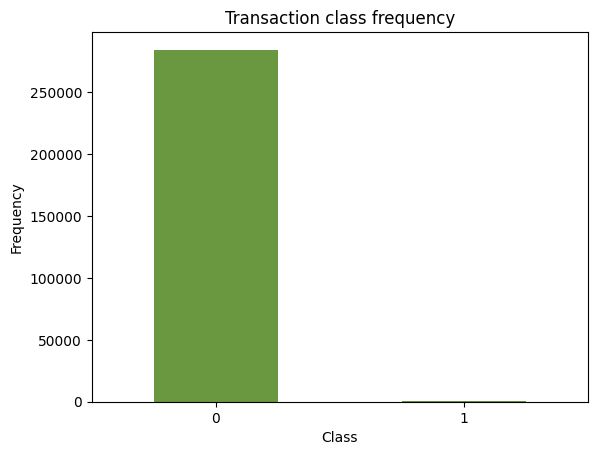

In [8]:
# plot of normal vs fraud transaction frequency

count_classes = pd.value_counts(data['Class'], sort= True)

count_classes.plot(kind = 'bar', rot = 0, color='#699841')

plt.title("Transaction class frequency")

plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:
fraud = data[data['Class'] == 1]

normal = data[data['Class'] == 0]

In [10]:
print('Fraud =', fraud.shape, 'Normal =', normal.shape)

Fraud = (492, 31) Normal = (284315, 31)


In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

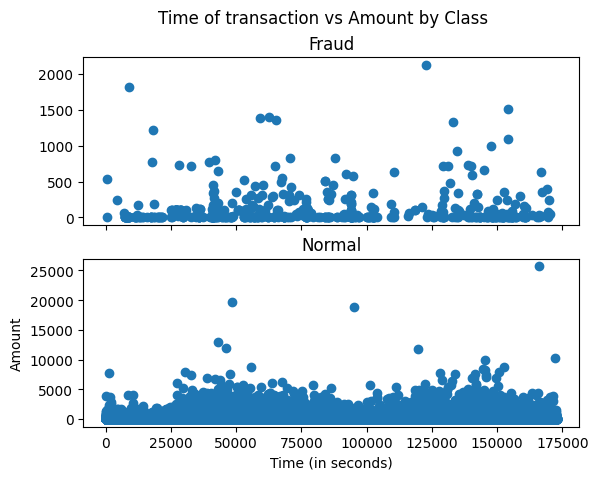

In [13]:
# Time vs Amount plot of Fraud and Normal transactions

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by Class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel("Time (in seconds)")
plt.ylabel("Amount")

plt.show()

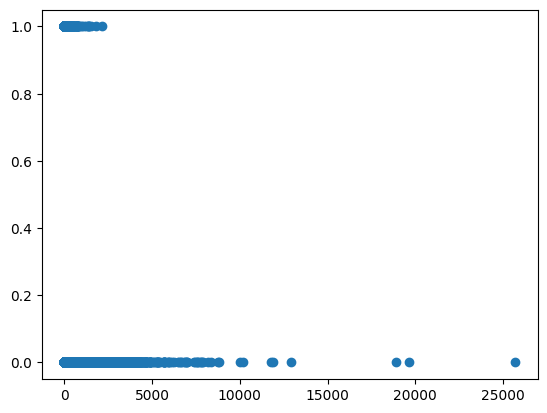

In [14]:
plt.scatter(data['Amount'], data['Class'])

In [15]:
# Data preprocessing
# Handling missing values
data.dropna(inplace=True)

In [16]:
# Splitting the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [17]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Applying PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [20]:
# Binary label, Class = 1 (fraud) and Class = 0 (no fraud)
class_names=np.array(['Normal (0)','Fraud (1)']) 

In [21]:
import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression Classifier

In [22]:
# Model development using Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Predicting the Test set results
y_pred_logistic = logistic_classifier.predict(X_test)

In [24]:
# Evaluating the Logistic Regression model
print("# Logistic Regression")
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Test Accuracy: ", accuracy_logistic)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_logistic, zero_division=1))

# Logistic Regression
Test Accuracy:  0.9982268881008391

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       1.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       1.00      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



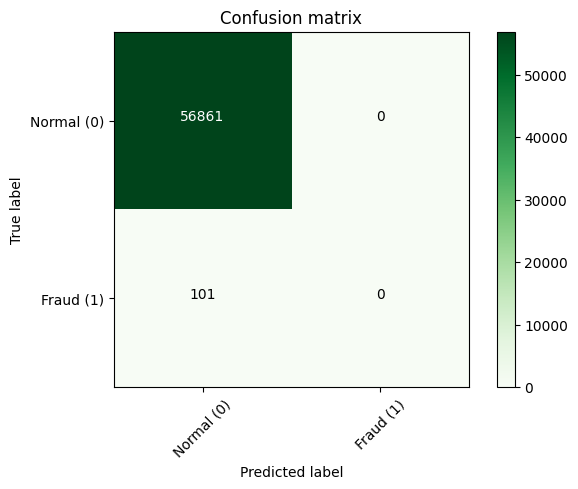

In [25]:
# plot confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plot_confusion_matrix(conf_matrix_logistic, class_names)

In [26]:
# ROC Curve for Logistic Regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

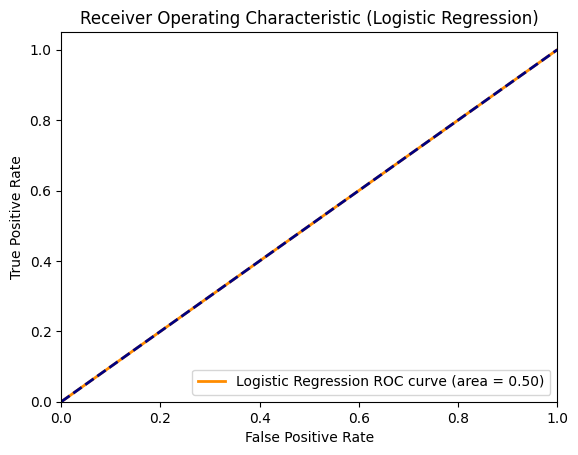

In [27]:
# Plotting the ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier

In [28]:
# Model development using Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_test)

In [30]:
# Evaluating the Random Forest model
print("# Random Forest Classifier")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy: ", accuracy_rf)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

# Random Forest Classifier
Test Accuracy:  0.9982268881008391

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       1.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       1.00      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



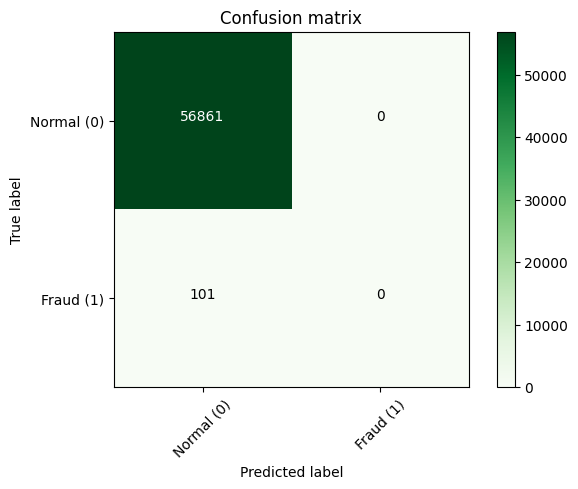

In [31]:
# plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_matrix_rf, class_names)

In [32]:
# ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

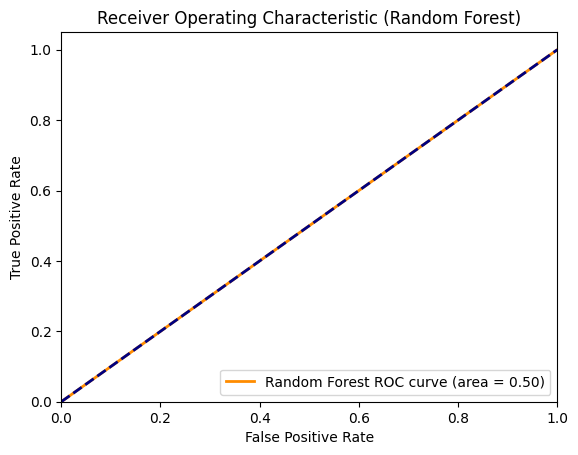

In [33]:
# Plotting the ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting Classifier

In [34]:
# Model development using Gradient Boosting Classifier 
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [35]:
# Predicting the Test set results
y_pred_gb = gb_classifier.predict(X_test)

In [36]:
# Evaluating the Gradient Boosting model
print("# Gradient Boosting Classifier")
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Test Accuracy: ", accuracy_gb)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_gb, zero_division=1))

# Gradient Boosting Classifier
Test Accuracy:  0.9976475545100242

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      1.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      1.00     56962
weighted avg       1.00      1.00      1.00     56962



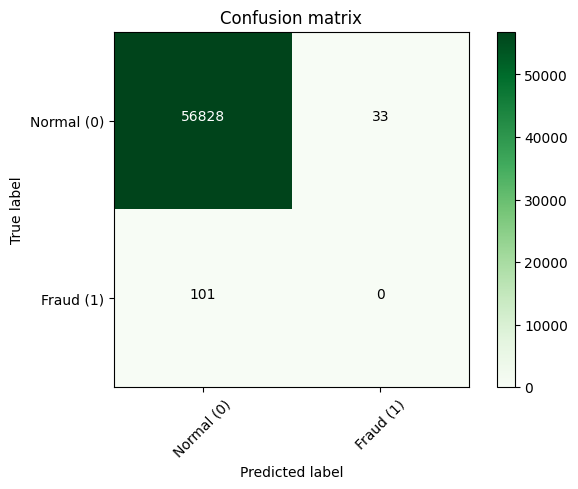

In [37]:
# plot confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plot_confusion_matrix(conf_matrix_gb, class_names)

In [38]:
# ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

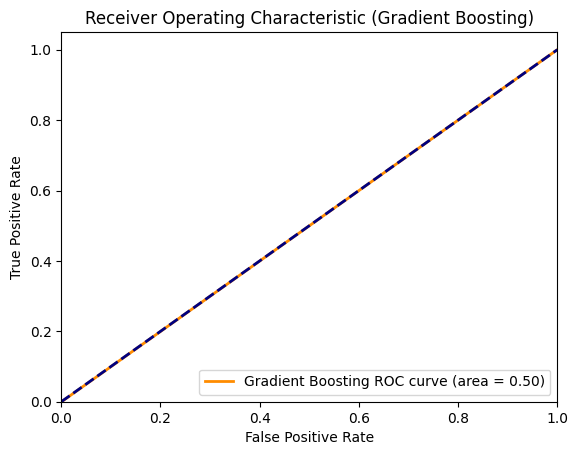

In [39]:
# Plotting the ROC curve for Gradient Boosting
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='Gradient Boosting ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gradient Boosting)')
plt.legend(loc='lower right')
plt.show()